# Challenge 1: What makes a diamond valuable?

## Load the dataset

In [1]:
# Clone the dataset from Github
!git clone https://github.com/1giacomo/xtream-ai-assignment.git

Cloning into 'xtream-ai-assignment'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 103 (delta 30), reused 20 (delta 8), pack-reused 41
Receiving objects: 100% (103/103), 2.22 MiB | 6.04 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [2]:
# Load the dataset from the .csv file
import pandas as pd
diamonds = pd.read_csv("./xtream-ai-assignment/datasets/diamonds/diamonds.csv")

In [3]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


## Raw data vis

Objective: to understand the dataset.

I notice:

* Some points on the ```y=0 axes```
* Some random point out of the distrubution
* Misterius points on ```carat=4``` and ```carat=3```

<Axes: xlabel='carat', ylabel='price'>

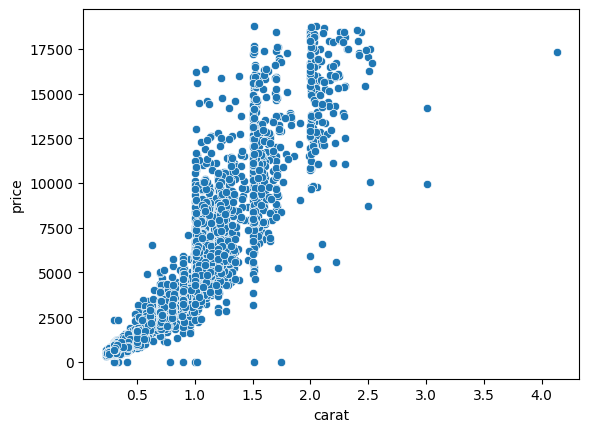

In [4]:
import seaborn as sns

sns.scatterplot(x='carat', y='price', data=diamonds)

## Dataset describe

Trying to investigate on ```price=0``` diamonds, I also find out ```size=0``` diamonds.


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


## Data cleaning

Requirements:
* Price: ```price > 0```
* Size: ```x > 0```, ```y > 0``` and ```z > 0```

For a better data visualizzation I hard-remove 3 point out of the distribution:
* Table: ```table = 95```
* Depth: ```depth = 44```
* Z: ```z = 1.41```

In [6]:
cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['x'] > 0]
cleaned_diamonds = cleaned_diamonds[cleaned_diamonds['table'] != 95][cleaned_diamonds['depth'] != 44][cleaned_diamonds['z'] != 1.41]
cleaned_diamonds.describe()

<ipython-input-6-b9432b7c7574>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['x'] > 0]
<ipython-input-6-b9432b7c7574>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = cleaned_diamonds[cleaned_diamonds['table'] != 95][cleaned_diamonds['depth'] != 44][cleaned_diamonds['z'] != 1.41]


,carat,depth,table,price,x,y,z
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,0.793708,61.715223,57.439892,3927.497393,5.725277,5.727902,3.533718
std,0.467714,1.423313,2.195956,3969.001513,1.115732,1.108673,0.687676
min,0.230000,53.000000,51.600000,351.000000,3.860000,3.840000,2.350000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.700000,3.525000
75%,1.040000,62.500000,59.000000,5371.750000,6.540000,6.530000,4.030000
max,4.130000,70.200000,70.000000,18787.000000,10.000000,9.850000,6.430000


## Convert categorical variables into scalars

**For the purpose of the exercise I assume all the categorical variables can be transformed in linear variables.** I can't find precise informations online.

Extras: I found that the colour range is D-J, but I mapped all the colours so that this script can also work with another dataset.

In [7]:
cut_mapping_dict = {
    "Ideal": 4,
    "Premium": 3,
    "Very Good": 2,
    "Good": 1,
    "Fair": 0,
}

# TODO: maybe there is a cleaner way to do it
color_mapping_dict = {
    "D": 22,
    "E": 21,
    "F": 20,
    "G": 19,
    "H": 18,
    "I": 17,
    "J": 16,
    "K": 15,
    "L": 14,
    "M": 13,
    "N": 12,
    "O": 11,
    "P": 10,
    "Q": 9,
    "R": 8,
    "S": 7,
    "T": 6,
    "U": 5,
    "V": 4,
    "W": 3,
    "X": 2,
    "Y": 1,
    "Z": 0
}

clarity_mapping_dict = {
    "IF": 7,
    "VVS1": 6,
    "VVS2": 5,
    "VS1": 4,
    "VS2": 3,
    "SI1": 2,
    "SI2": 1,
    "I1": 0
}



In [8]:
cleaned_diamonds['cut'] = cleaned_diamonds['cut'].replace(cut_mapping_dict)
cleaned_diamonds['color'] = cleaned_diamonds['color'].replace(color_mapping_dict)
cleaned_diamonds['clarity'] = cleaned_diamonds['clarity'].replace(clarity_mapping_dict)
cleaned_diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000,4986.000000
mean,0.793708,2.901524,19.392700,3.059166,61.715223,57.439892,3927.497393,5.725277,5.727902,3.533718
std,0.467714,1.120847,1.691628,1.632269,1.423313,2.195956,3969.001513,1.115732,1.108673,0.687676
min,0.230000,0.000000,16.000000,0.000000,53.000000,51.600000,351.000000,3.860000,3.840000,2.350000
25%,0.400000,2.000000,18.000000,2.000000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,3.000000,19.000000,3.000000,61.800000,57.000000,2396.000000,5.690000,5.700000,3.525000
75%,1.040000,4.000000,21.000000,4.000000,62.500000,59.000000,5371.750000,6.540000,6.530000,4.030000
max,4.130000,4.000000,22.000000,7.000000,70.200000,70.000000,18787.000000,10.000000,9.850000,6.430000


## Data vis

### Carat and cut vs. price

<Axes: xlabel='carat', ylabel='price'>

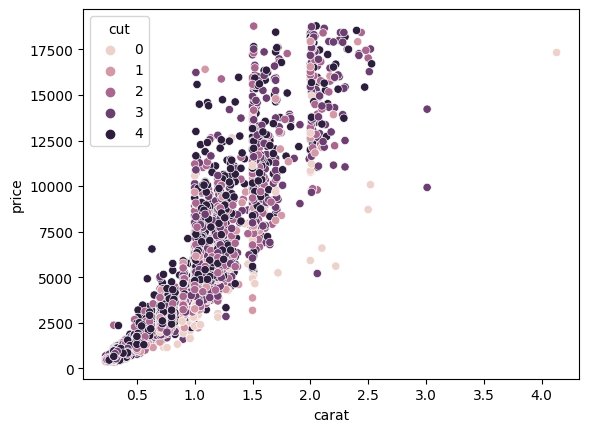

In [9]:
sns.scatterplot(x='carat', y='price', hue='cut', data=cleaned_diamonds)

### Size vs. price

The visualizzation appears really similar.

Of course because a bigger diamond has a bigger mass (and a more carats).

<Axes: xlabel='size', ylabel='price'>

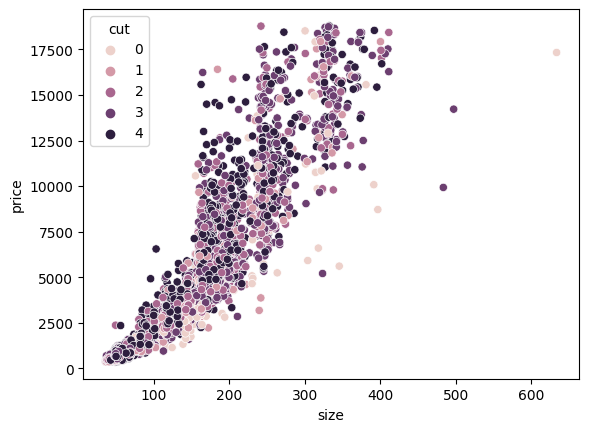

In [10]:
cleaned_diamonds['size'] = cleaned_diamonds['x']*cleaned_diamonds['y']*cleaned_diamonds['z']
sns.scatterplot(x='size', y='price', hue='cut', data=cleaned_diamonds)

### X vs.table and Z vs. depth

$$ \text{table} = \frac{table_{\text{width}}}{x} \times 100 $$

$$ \text{depth} = \frac{z_{\text{depth}}}{z} \times 100 $$

#### Deductions

I can deduce:

* The best cuts have a lower table
* The best cuts have a depth in the range 60%-63%

<Axes: xlabel='x', ylabel='table'>

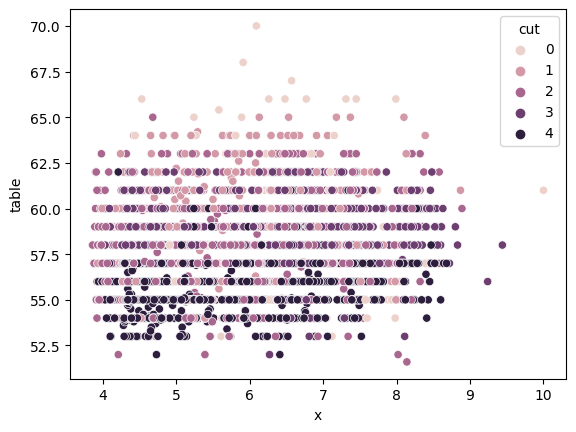

In [11]:
sns.scatterplot(x='x', y='table', hue='cut', data=cleaned_diamonds)

<Axes: xlabel='z', ylabel='depth'>

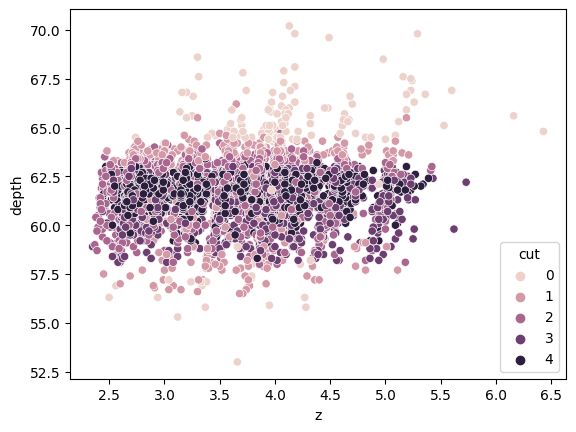

In [12]:
sns.scatterplot(x='z', y='depth', hue='cut', data=cleaned_diamonds)

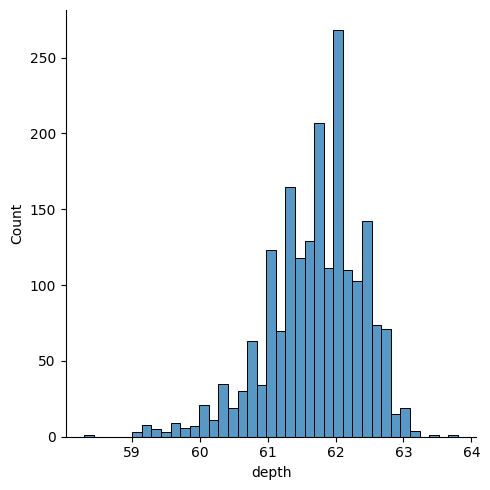

In [17]:
sns.displot(x='depth', data=cleaned_diamonds[cleaned_diamonds['cut'] == 4])